In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 1500 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 1500 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":1500, 'savefig.dpi':1500}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from time import time
import timeit #imports timeit module
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [12]:
df = pd.read_csv('../SVSM_SurfCity.csv')
df['BIN'] = np.where(df['NWI']=='wetland', 1, 0)
df['NWI'].value_counts()
df

,GRID_ID,NWI,dem_MIN,dem_MAX,dem_RANGE,dem_MEAN,dem_STD,dem_SUM,dem_MEDIAN,demS_MIN,...,NDRE_SUM,NDRE_MEDIAN,NDWI_MIN,NDWI_MAX,NDWI_RANGE,NDWI_MEAN,NDWI_STD,NDWI_SUM,NDWI_MEDIAN,BIN
0,AA-100,wetland,1.493541,1.955493,0.461952,1.792245,0.102500,172.055543,1.811748,1.574986,...,97.625904,0.146679,0.070826,0.200282,0.129456,0.147249,0.019188,97.625904,0.146679,1
1,AA-101,wetland,1.793308,2.000039,0.206731,1.881790,0.031989,193.824321,1.882854,1.733616,...,99.287870,0.153061,0.099037,0.208831,0.109794,0.153459,0.016545,99.287870,0.153061,1
2,AA-102,wetland,1.826029,2.159196,0.333167,1.902186,0.052551,194.022975,1.885938,1.786432,...,97.028358,0.146242,0.095568,0.190611,0.095043,0.146127,0.016328,97.028358,0.146242,1
3,AA-103,wetland,1.799260,1.984073,0.184813,1.865700,0.029773,192.167109,1.862764,1.760622,...,94.724609,0.146900,0.096352,0.194388,0.098036,0.146406,0.014958,94.724609,0.146900,1
4,AA-104,wetland,1.779996,1.919027,0.139031,1.845594,0.032779,188.250590,1.845443,1.747722,...,87.877235,0.133090,0.077379,0.175408,0.098028,0.132745,0.016691,87.877235,0.133090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30064,Z-95,wetland,1.577974,1.832777,0.254803,1.748172,0.052526,181.809901,1.756294,1.652627,...,105.789961,0.158787,0.099838,0.244716,0.144878,0.160045,0.019199,105.789961,0.158787,1
30065,Z-96,wetland,1.643019,1.813549,0.170530,1.738646,0.042061,180.819235,1.744999,1.647199,...,94.439379,0.146637,0.083797,0.209457,0.125660,0.146191,0.019606,94.439379,0.146637,1
30066,Z-97,wetland,1.670815,1.876041,0.205226,1.757889,0.043780,179.304688,1.759013,1.654880,...,96.498969,0.145386,0.075544,0.214430,0.138886,0.145549,0.020934,96.498969,0.145386,1
30067,Z-98,wetland,1.770075,2.137457,0.367382,1.932508,0.097355,183.588286,1.913676,1.762921,...,99.041400,0.153841,0.088288,0.222826,0.134538,0.153078,0.019323,99.041400,0.153841,1


# Comprehensive LGBM

In [13]:
def LGBM(X, y, gridid):
    fig, ax = plt.subplots()
    tree_axs = []
    
    start_time = timeit.default_timer()

    kf = KFold(n_splits=5, random_state=2, shuffle=True)
    acc_score = [];
    Truth = [];
    Output = [];
    GRID_ID = pd.DataFrame(columns=['GRID_ID'])

    feature_importances = pd.DataFrame()
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train_index , test_index) in tqdm(enumerate(kf.split(df))):
        X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]
        train_grid = gridid.iloc[train_index]
        test_grid= gridid.iloc[test_index]

        model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6 ,random_state=2)

        model.fit(X_train, y_train)
        pred_values = model.predict(X_test)
        
        t_ax = lgb.plot_tree(model, orientation='horizontal')
        tree_axs.append(t_ax)
        
        feature_importance = model.feature_importances_
        rel_imp = pd.DataFrame(feature_importance, index=X_train.columns, columns=[i])
        feature_importances = pd.concat([feature_importances, rel_imp], axis=1)

        viz = plot_roc_curve(model, X_test, y_test,
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        acc = accuracy_score(y_test, pred_values)
        acc_score.append(acc)

        GRID_ID = pd.merge(GRID_ID, test_grid, on='GRID_ID', how='outer')
        Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
        Output.extend(pred_values);

    elapsed = timeit.default_timer() - start_time

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="ROC for Light Gradient Boosting Model")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    
    feature_importances['mean'] = feature_importances.iloc[:, 0:5].mean(axis=1)

    output_df = pd.concat([GRID_ID, pd.DataFrame(Truth, columns=["Truth"]), pd.DataFrame(Output, columns=["Output"])], axis=1)
    return output_df, elapsed, confusion_matrix(Truth, Output), classification_report(Truth, Output, digits=4), acc_score, plt, feature_importances['mean'], tree_axs

5it [00:09,  1.89s/it]

9.439075000000003 seconds
[0.9580977718656468, 0.963751247090123, 0.9632524110409045, 0.9572663784502827, 0.9629136870114752]
0.9610562990916864 accuracy
[[ 1733   965]
 [  206 27165]]
              precision    recall  f1-score   support

           0     0.8938    0.6423    0.7475      2698
           1     0.9657    0.9925    0.9789     27371

    accuracy                         0.9611     30069
   macro avg     0.9297    0.8174    0.8632     30069
weighted avg     0.9592    0.9611    0.9581     30069

<module 'matplotlib.pyplot' from 'C:\\Users\\shiti\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


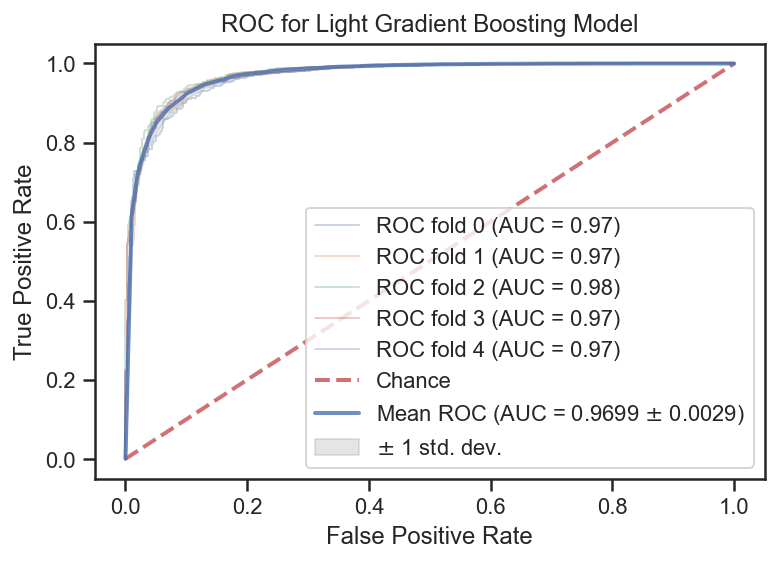

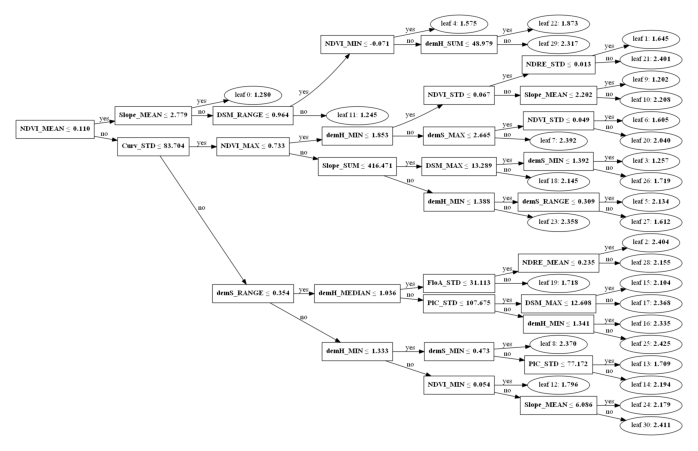

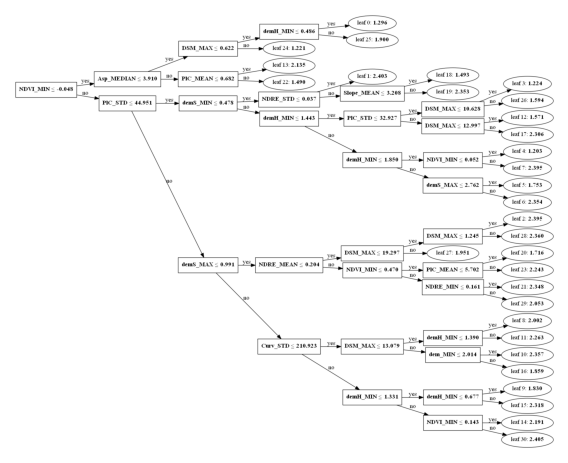

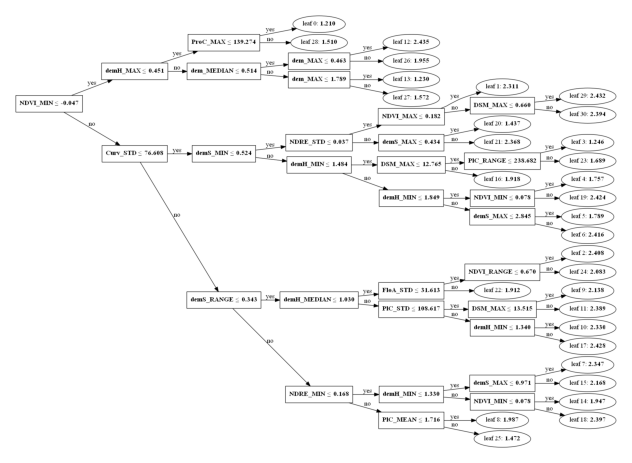

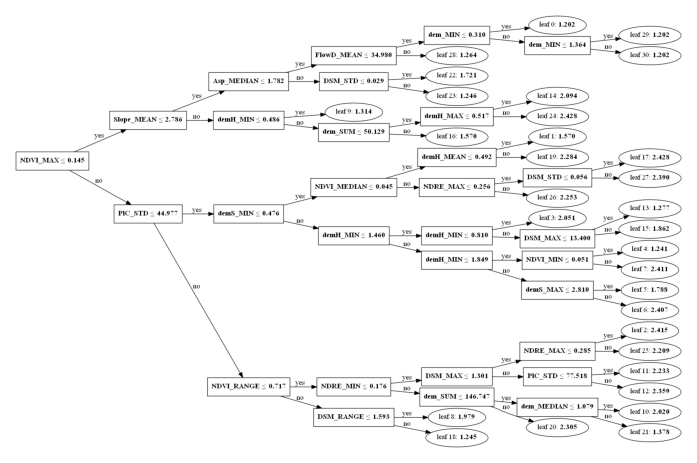

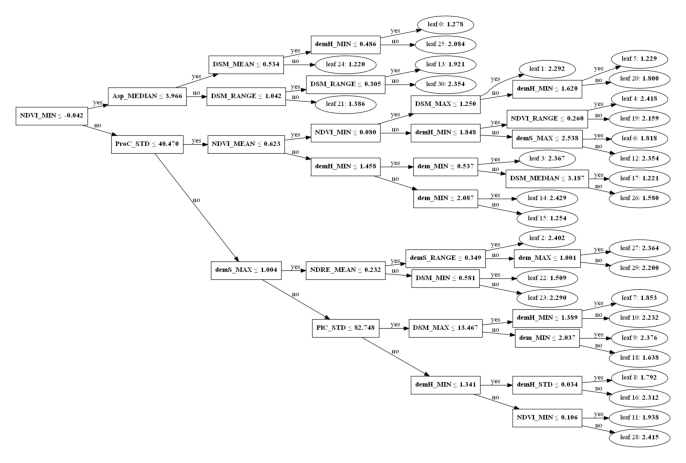

In [15]:
X = df.drop(['GRID_ID', 'NWI', 'BIN'], axis=1)
y = df.BIN
gridid = df.GRID_ID
output_df, time, cm, cr, acc, roc, feat_imp, tree_axs = LGBM(X, y, gridid)
print(f"{time} seconds")
print(f"{acc}")
print(f"{np.mean(acc)} accuracy")
print(cm)
print(cr)
print(roc)

# Testing it with previous information

In [24]:
dfMay = pd.read_csv('../../Maysville 2m Analysis/Maysville_multi_quan.csv')
dfMay['BIN'] = np.where(dfMay['NWI']=='wetland', 1, 0)
dfRR = pd.read_csv('../../RiverRd 2m Analysis/RR_2m_Quan_multi.csv')
dfRR['BIN'] = np.where(dfRR['NWI']=='wetland', 1, 0)
dfRR['NWI'] = np.where(dfRR['NWI']=='wetland', 'wetland', 'nonwetland')

dfPrev = pd.concat([dfRR, dfMay], ignore_index=True)
dfPrev = dfPrev.drop("GRID_ID", axis=1)
dfPrev

,NDVI_MIN,NDVI_MAX,NDVI_RANGE,NDVI_MEAN,NDVI_STD,NDVI_SUM,NDVI_MEDIAN,NDRE_MIN,NDRE_MAX,NDRE_RANGE,...,proC_MEDIAN,plC_MIN,plC_MAX,plC_RANGE,plC_MEAN,plC_STD,plC_SUM,plC_MEDIAN,NWI,BIN
0,-0.207988,0.232068,0.440056,0.002756,0.066000,1.750306,0.001381,-0.267779,0.534594,0.802373,...,0.000006,-116.022873,74.307251,190.330124,-1.931643,20.721613,-222.138917,0.046197,wetland,1
1,-0.179223,0.233833,0.413055,0.009687,0.065281,6.141297,0.007450,-0.275273,0.504642,0.779915,...,0.000000,-112.348358,79.551590,191.899948,1.146548,20.940329,124.973686,0.000002,wetland,1
2,-0.174281,0.258951,0.433232,0.000092,0.061539,0.058501,-0.000868,-0.187059,0.516976,0.704034,...,0.000000,-12.297682,16.543531,28.841213,0.222518,4.183839,24.476934,-0.000002,wetland,1
3,-0.188502,0.195425,0.383927,-0.011765,0.064216,-7.470468,-0.015106,-0.223469,0.506261,0.729731,...,-0.000027,-98.725197,4.919070,103.644267,-1.888735,12.442034,-217.204569,0.000132,wetland,1
4,-0.183300,0.229832,0.413132,-0.001524,0.063713,-0.966207,-0.002236,-0.209080,0.510509,0.719589,...,-0.000094,-30.727926,39.406685,70.134611,1.955307,8.178921,213.128429,0.000000,wetland,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38952,0.334489,0.847716,0.513227,0.660332,0.157092,402.802497,0.740841,0.085292,0.195614,0.110323,...,2.610091,-109.674965,52.485653,162.160618,-1.894092,26.343759,-100.386901,1.848647,nonwetland,0
38953,0.243782,0.714669,0.470886,0.407376,0.104808,250.536259,0.377142,-0.104563,0.166507,0.271069,...,-2.463012,-105.165627,146.468338,251.633964,2.576983,35.841134,136.580098,1.943974,nonwetland,0
38954,0.193201,0.729986,0.536784,0.459655,0.079894,280.389806,0.452428,-0.056917,0.162874,0.219791,...,-0.963185,-28.278624,51.978683,80.257307,1.310461,14.574438,69.454407,-1.452311,nonwetland,0
38955,0.359675,0.765521,0.405846,0.558627,0.081545,341.879580,0.559623,0.039186,0.225116,0.185930,...,2.438884,-81.181847,66.717560,147.899406,3.181117,34.461817,171.780303,2.974431,nonwetland,0


In [26]:
# train the model
X = dfPrev.drop(['NWI', 'BIN'], axis=1)
y = dfPrev.BIN
model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6 ,random_state=2)
model.fit(X, y)

#test it on surf city
Truth = []
Output = []

X_pred = df.drop(['GRID_ID', 'NWI', 'BIN'], axis=1)
y_pred = df.BIN
pred_values = model.predict(X_pred)
acc = accuracy_score(y_pred, pred_values)
Truth.extend(y_pred.values.reshape(y_pred.shape[0]))
Output.extend(pred_values)
conf_mat = confusion_matrix(Truth, Output)
class_rep = classification_report(Truth, Output, digits=4)
GRID_ID = df.GRID_ID
output_df = pd.concat([GRID_ID, pd.DataFrame(Truth, columns=["Truth"]), pd.DataFrame(Output, columns=["Output"])], axis=1)
print(acc)
print(conf_mat)
print(class_rep)

# mfw accuracy is 8%
# end me, why are we even doing this

0.08646779074794639
[[ 2577   121]
 [27348    23]]
              precision    recall  f1-score   support

           0     0.0861    0.9552    0.1580      2698
           1     0.1597    0.0008    0.0017     27371

    accuracy                         0.0865     30069
   macro avg     0.1229    0.4780    0.0798     30069
weighted avg     0.1531    0.0865    0.0157     30069

